<a href="https://colab.research.google.com/github/KwonDuHyeon/hanghae99/blob/main/3%EC%A3%BC%EC%B0%A8%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%9C(%EA%B6%8C%EB%91%90%ED%98%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[MY CODE] 라이브러리 import

In [15]:
# !pip install tqdm boto3 requests regex sentencepiece sacremoses datasets #로컬로 사용

In [16]:
from datasets import load_dataset
from torch.utils.data import DataLoader
import torch
import pandas as pd
import os

## [MY CODE] MNLI Task Dataset Load

In [17]:
train_data_path = "/mnt/d/hanghae99/3rd/datasets/train.csv"
val_data_path = "/mnt/d/hanghae99/3rd/datasets/val.csv"

train_df = pd.read_csv(train_data_path)[:10000]
val_df = pd.read_csv(val_data_path)

## [MY CODE] Datasets 확인

In [18]:
print(f"Train 데이터 갯수: {len(train_df)}")
print(f"Validation 데이터 갯수: {len(val_df)}")

Train 데이터 갯수: 10000
Validation 데이터 갯수: 9832


In [19]:
train_df.head()

,promptID,pairID,premise,premise_binary_parse,premise_parse,hypothesis,hypothesis_binary_parse,hypothesis_parse,genre,label
0,31193,31193n,Conceptually cream skimming has two basic dime...,( ( Conceptually ( cream skimming ) ) ( ( has ...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,Product and geography are what make cream skim...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...,government,1
1,101457,101457e,you know during the season and i guess at at y...,( you ( ( know ( during ( ( ( the season ) and...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,You lose the things to the following level if ...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...,telephone,0
2,134793,134793e,One of our number will carry out your instruct...,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,A member of my team will execute your orders w...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...,fiction,0
3,37397,37397e,How do you know? All this is their information...,( ( How ( ( ( do you ) know ) ? ) ) ( ( All th...,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,This information belongs to them.,( ( This information ) ( ( belongs ( to them )...,(ROOT (S (NP (DT This) (NN information)) (VP (...,fiction,0
4,50563,50563n,yeah i tell you what though if you go price so...,( yeah ( i ( ( tell you ) ( what ( ( though ( ...,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,The tennis shoes have a range of prices.,( ( The ( tennis shoes ) ) ( ( have ( ( a rang...,(ROOT (S (NP (DT The) (NN tennis) (NNS shoes))...,telephone,1


In [20]:
val_df.head()

,promptID,pairID,premise,premise_binary_parse,premise_parse,hypothesis,hypothesis_binary_parse,hypothesis_parse,genre,label
0,75290,75290c,Your contribution helped make it possible for ...,( ( Your contribution ) ( ( helped ( make ( it...,(ROOT (S (NP (PRP$ Your) (NN contribution)) (V...,Your contributions were of no help with our st...,( ( Your contributions ) ( ( were ( of ( ( no ...,(ROOT (S (NP (PRP$ Your) (NNS contributions)) ...,letters,2
1,133794,133794c,"The answer has nothing to do with their cause,...",( ( ( ( ( ( The answer ) ( ( ( ( has nothing )...,(ROOT (S (S (NP (DT The) (NN answer)) (VP (VBZ...,Dictionaries are indeed exercises in bi-unique...,( Dictionaries ( ( ( are indeed ) ( exercises ...,(ROOT (S (NP (NNS Dictionaries)) (VP (VBP are)...,verbatim,2
2,3628,3628c,We serve a classic Tuscan meal that includes ...,( We ( ( serve ( ( a ( classic ( Tuscan meal )...,(ROOT (S (NP (PRP We)) (VP (VBP serve) (NP (NP...,We serve a meal of Florentine terrine.,( We ( ( serve ( ( a meal ) ( of ( Florentine ...,(ROOT (S (NP (PRP We)) (VP (VBP serve) (NP (NP...,verbatim,0
3,89411,89411c,"A few months ago, Carl Newton and I wrote a le...","( ( ( A ( few months ) ) ago ) ( , ( ( ( ( Car...",(ROOT (S (ADVP (NP (DT A) (JJ few) (NNS months...,Carl Newton and I have never had any other pre...,( ( ( ( Carl Newton ) and ) I ) ( ( ( have nev...,(ROOT (S (NP (NP (NNP Carl) (NNP Newton)) (CC ...,letters,2
4,136158,136158e,"I was on this earth you know, I've lived on th...",( I ( ( was ( on ( ( this earth ) ( you ( know...,(ROOT (S (NP (PRP I)) (VP (VBD was) (PP (IN on...,I don't yet know the reason why I have lived o...,( I ( ( ( ( do n't ) yet ) ( ( know ( the reas...,(ROOT (S (NP (PRP I)) (VP (VBP do) (RB n't) (A...,facetoface,0


In [21]:
# Label 종류 확인 (train 데이터)
train_labels = train_df['genre'].unique()
print(f"Train genre: {train_labels}")

# Label 종류 확인 (validation 데이터)
val_labels = val_df['genre'].unique()
print(f"Validation genre: {val_labels}")

Train genre: ['government' 'telephone' 'fiction' 'travel' 'slate']
Validation genre: ['letters' 'verbatim' 'facetoface' 'oup' 'nineeleven']


## [MY CODE] BERT 모델로 변경

In [22]:


tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')

def collate_fn(batch):
  max_len = 400
  premises, hypotheses, labels = [], [], []
  for row in batch:
    premise = str(row['premise'])
    hypothesis = str(row['hypothesis'])

    premises.append(premise)
    hypotheses.append(hypothesis)
    labels.append(row['label'])

  encoding = tokenizer(premises, hypotheses, padding = True, truncation = True, max_length = max_len,  return_tensors='pt')  # tensor 형테로 반환
  labels = torch.tensor(labels, dtype=torch.long)

  return encoding['input_ids'], encoding['attention_mask'], labels


train_loader = DataLoader(
    train_df.to_dict('records'), batch_size=64, shuffle=True, collate_fn=collate_fn
)
test_loader = DataLoader(
    val_df.to_dict('records'), batch_size=64, shuffle=False, collate_fn=collate_fn
)

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


## [MY CODE] BERT 모델 Load

In [23]:
model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased')
model

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [24]:
from torch import nn


class TextClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased')
    self.classifier = nn.Linear(768, 3)

  def forward(self,input_ids, attention_mask):
    outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
    cls_output = outputs.last_hidden_state[:, 0]
    logits = self.classifier(cls_output)
    return logits


model = TextClassifier()

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


In [25]:
for param in model.encoder.parameters():
  param.requires_grad = False

In [26]:
train_acc_list = []
test_acc_list = []
train_loss_list = []
test_loss_list = []

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    input_ids, attention_mask, labels = data  # input_ids와 attention_mask 추가
    input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda').long()

    preds = model(input_ids, attention_mask=attention_mask)  # attention_mask 전달
    preds = torch.argmax(preds, dim=-1)  # 가장 높은 로짓 값을 가지는 클래스 선택

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def compute_loss(model, dataloader, criterion):
    total_loss = 0.0

    for data in dataloader:
        input_ids, attention_mask, labels = data
        input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda').long()

        preds = model(input_ids, attention_mask=attention_mask)
        loss = criterion(preds, labels)
        total_loss += loss.item()

    return total_loss / len(dataloader)

## [MY CODE] CrossEntropyLoss, model 학습

In [27]:
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# 학습된 모델 저장 디렉토
save_dir = "/mnt/d/hanghae99/3rd/pth/"
os.makedirs(save_dir, exist_ok=True)

lr = 0.001
model = model.to('cuda')
#  loss_fn = nn.BCEWithLogitsLoss()

criterion = nn.CrossEntropyLoss() # CrossEntropyLoss 정의
optimizer = Adam(model.parameters(), lr=lr)
n_epochs = 10

for epoch in range(n_epochs):
  total_loss = 0.
  model.train()

  for data in train_loader:
    model.zero_grad()
    input_ids, attention_mask, labels = data
    input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda').long() # 정수형 레이블

    preds = model(input_ids, attention_mask=attention_mask) # Logits 형태로 출력
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  save_path = os.path.join(save_dir, f"epoch_{epoch + 1}.pth") # 학습 모델 저장
  torch.save(model.state_dict(), save_path)

  with torch.no_grad():
    model.eval()
    train_acc = accuracy(model, train_loader)
    test_acc = accuracy(model, test_loader)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    test_loss = compute_loss(model, test_loader, criterion)
    test_loss_list.append(test_loss)

  print(f"Epoch {epoch:3d} | Train Loss: {total_loss} |  Train acc: {train_acc:.3f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.3f}")

Epoch   0 | Train Loss: 168.92337518930435 |  Train acc: 0.474 | Test Loss: 1.0482 | Test Acc: 0.447
Epoch   1 | Train Loss: 162.1349281668663 |  Train acc: 0.517 | Test Loss: 1.0197 | Test Acc: 0.485
Epoch   2 | Train Loss: 159.54458433389664 |  Train acc: 0.493 | Test Loss: 1.0241 | Test Acc: 0.478
Epoch   3 | Train Loss: 158.10050332546234 |  Train acc: 0.536 | Test Loss: 1.0139 | Test Acc: 0.487
Epoch   4 | Train Loss: 156.6526682972908 |  Train acc: 0.548 | Test Loss: 1.0005 | Test Acc: 0.499
Epoch   5 | Train Loss: 156.94449925422668 |  Train acc: 0.525 | Test Loss: 1.0273 | Test Acc: 0.478
Epoch   6 | Train Loss: 156.26620090007782 |  Train acc: 0.529 | Test Loss: 1.0233 | Test Acc: 0.488
Epoch   7 | Train Loss: 154.9352923631668 |  Train acc: 0.541 | Test Loss: 1.0079 | Test Acc: 0.495
Epoch   8 | Train Loss: 154.40411114692688 |  Train acc: 0.558 | Test Loss: 0.9974 | Test Acc: 0.507
Epoch   9 | Train Loss: 154.2315393090248 |  Train acc: 0.555 | Test Loss: 0.9935 | Test Acc: 

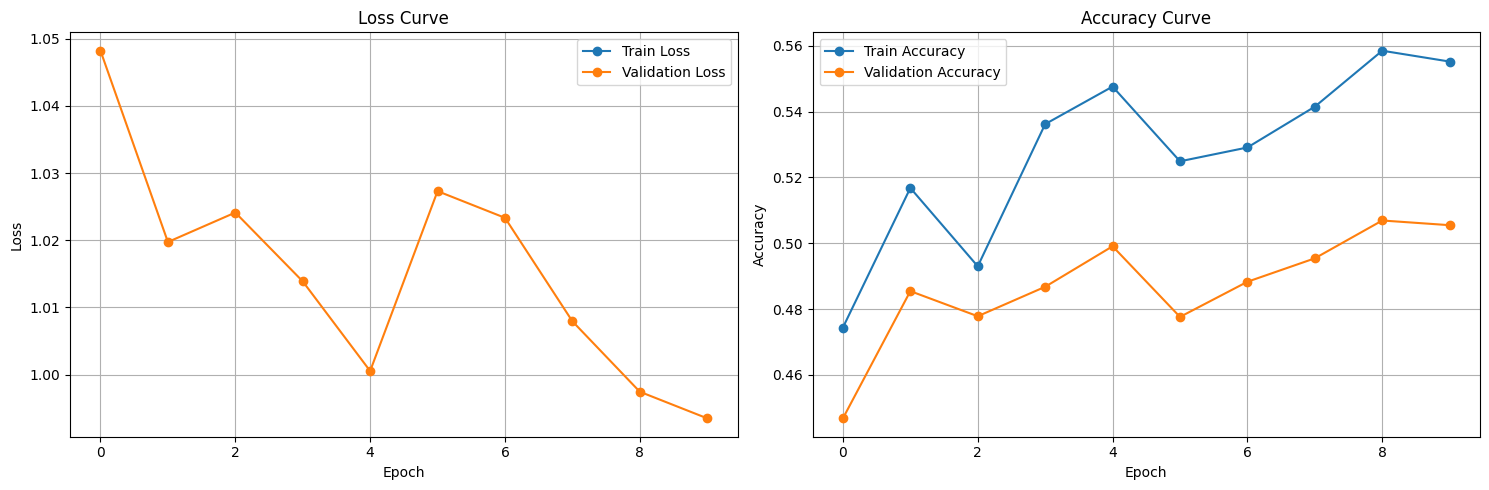

In [28]:

def plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list):

    plt.figure(figsize=(15, 5))

    # 손실 곡선
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_list, label="Train Loss", marker='o')
    plt.plot(test_loss_list, label="Validation Loss", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid(True)

    # 정확도 곡선
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_list, label="Train Accuracy", marker='o')
    plt.plot(test_acc_list, label="Validation Accuracy", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list)

## [MY CODE] CrossEntropyLoss 맞게 accuracy 수정

## [MY CODE] 학습 결과 테스트

In [29]:
def load_model(filepath, model_class):
    model = model_class()
    model.load_state_dict(torch.load(filepath))
    model = model.to('cuda')
    model.eval()
    return model

def predict_from_variables(model, tokenizer, premise, hypothesis, label_map):
    # 입력 텍스트를 토큰화
    inputs = tokenizer(
        premise,
        text_pair=hypothesis,
        padding=True,
        truncation=True,
        max_length=400,
        return_tensors="pt"
    )
    input_ids = inputs["input_ids"].to("cuda")
    attention_mask = inputs["attention_mask"].to("cuda")

    # 모델 예측
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predicted_class = torch.argmax(outputs, dim=-1).item()

    return label_map[predicted_class]

model_path = '/mnt/d/hanghae99/3rd/pth/epoch_10.pth'
load_model(model_path, TextClassifier)
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')
label_map = {0: "Entailment", 1: "Neutral", 2: "Contradiction"}

premise = "A man is playing a guitar on the stage."
hypothesis = "The man is performing music."

predicted_label = predict_from_variables(model, tokenizer, premise, hypothesis, label_map)

# 결과 출력
print(f"Premise: {premise}")
print(f"Hypothesis: {hypothesis}")
print(f"Predicted Label: {predicted_label}")

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main
Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


Premise: A man is playing a guitar on the stage.
Hypothesis: The man is performing music.
Predicted Label: Entailment


## [MY CODE] Find-Tuning 진행

----------------------------------

## [MY CODE] Train, val 데이터셋 비율 조절(train:10000, val : 2000)

In [30]:
train_fine_df = pd.read_csv(train_data_path)[:10000]
val_fine_df = pd.read_csv(val_data_path)[:2000]

In [31]:
print(f"Train 데이터 갯수: {len(train_fine_df)}")
print(f"Validation 데이터 갯수: {len(val_fine_df)}")

Train 데이터 갯수: 10000
Validation 데이터 갯수: 2000


## [MY CODE] MAX_LEN 크기를 128로 변경

In [32]:
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')

def collate_fn(batch):
  max_len = 128  # max_len 128로 수정
  premises, hypotheses, labels = [], [], []
  for row in batch:
    premise = str(row['premise'])
    hypothesis = str(row['hypothesis'])

    premises.append(premise)
    hypotheses.append(hypothesis)
    labels.append(row['label'])

  encoding = tokenizer(premises, hypotheses, padding = True, truncation = True, max_length = max_len,  return_tensors='pt')  # tensor 형테로 반환
  labels = torch.tensor(labels, dtype=torch.long)

  return encoding['input_ids'], encoding['attention_mask'], labels


train_loader = DataLoader(
    train_fine_df.to_dict('records'), batch_size=64, shuffle=True, collate_fn=collate_fn
)
test_loader = DataLoader(
    val_fine_df.to_dict('records'), batch_size=64, shuffle=False, collate_fn=collate_fn
)

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


## [MY CODE] layer를 전체 다 보는것이 아닌  마지막 4개의 레이어를 제외한 레이어들의 파라미터를 대상으로 작업을 수행

In [33]:
for param in model.encoder.encoder.layer[:-4].parameters():
    param.requires_grad = False

## [MY CODE] Lr 0.00005로 변경, AdamW로 변경

In [34]:
from torch.optim import Adam
from torch.optim import AdamW
import numpy as np
import matplotlib.pyplot as plt
import os



train_fine_acc_list = []
test_fine_acc_list = []
train_fine_loss_list = []
test_fine_loss_list = []


# 학습된 모델 저장 디렉토
save_dir = "/mnt/d/hanghae99/3rd/fine-tuning_pth/"
os.makedirs(save_dir, exist_ok=True)

lr = 0.00005   # learning rate 변경
model = TextClassifier()
model = model.to('cuda')
#  loss_fn = nn.BCEWithLogitsLoss()

criterion = nn.CrossEntropyLoss() # CrossEntropyLoss 정의
optimizer = AdamW(model.parameters(), lr=lr,  weight_decay=0.01)  # AdamW 변
n_epochs = 10

for epoch in range(n_epochs):
  total_fine_loss = 0.
  model.train()

  for batch_idx, data in enumerate(train_loader):
    model.zero_grad()
    input_ids, attention_mask, labels = data
    input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda').long() # 정수형 레이블
    preds = model(input_ids, attention_mask=attention_mask) # Logits 형태로 출력
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    # print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}/{len(train_loader)}")

    total_fine_loss += loss.item()

  save_path = os.path.join(save_dir, f"epoch_{epoch + 1}.pth") # 학습 모델 저장
  torch.save(model.state_dict(), save_path)
  with torch.no_grad():
    model.eval()
    train_fine_acc = accuracy(model, train_loader)
    test_fine_acc = accuracy(model, test_loader)
    train_fine_acc_list.append(train_fine_acc)
    test_fine_acc_list.append(test_fine_acc)

    test_fine_loss = compute_loss(model, test_loader, criterion)
    test_fine_loss_list.append(test_fine_loss)
    train_fine_loss_list.append(total_fine_loss)

  print(f"Epoch {epoch:3d} | Train Loss: {total_fine_loss} |  Train acc: {train_fine_acc:.3f} | Test Loss: {test_fine_loss:.4f} | Test Acc: {test_fine_acc:.3f}")

Using cache found in /home/harry/.cache/torch/hub/huggingface_pytorch-transformers_main


Epoch   0 | Train Loss: 132.2645412683487 |  Train acc: 0.806 | Test Loss: 0.6774 | Test Acc: 0.720
Epoch   1 | Train Loss: 78.89077657461166 |  Train acc: 0.955 | Test Loss: 0.7172 | Test Acc: 0.736
Epoch   2 | Train Loss: 34.25407540053129 |  Train acc: 0.984 | Test Loss: 0.9612 | Test Acc: 0.735
Epoch   3 | Train Loss: 14.999165959656239 |  Train acc: 0.995 | Test Loss: 1.0613 | Test Acc: 0.735
Epoch   4 | Train Loss: 11.76001217868179 |  Train acc: 0.995 | Test Loss: 1.0974 | Test Acc: 0.718
Epoch   5 | Train Loss: 6.724647466093302 |  Train acc: 0.996 | Test Loss: 1.4352 | Test Acc: 0.712
Epoch   6 | Train Loss: 5.8206289518857375 |  Train acc: 0.998 | Test Loss: 1.3234 | Test Acc: 0.728
Epoch   7 | Train Loss: 6.0273442058824 |  Train acc: 0.999 | Test Loss: 1.2604 | Test Acc: 0.740
Epoch   8 | Train Loss: 4.343261705478653 |  Train acc: 0.997 | Test Loss: 1.3674 | Test Acc: 0.717
Epoch   9 | Train Loss: 3.6968567364965566 |  Train acc: 0.999 | Test Loss: 1.4539 | Test Acc: 0.732

## [MY CODE] 결과 그래프 출력

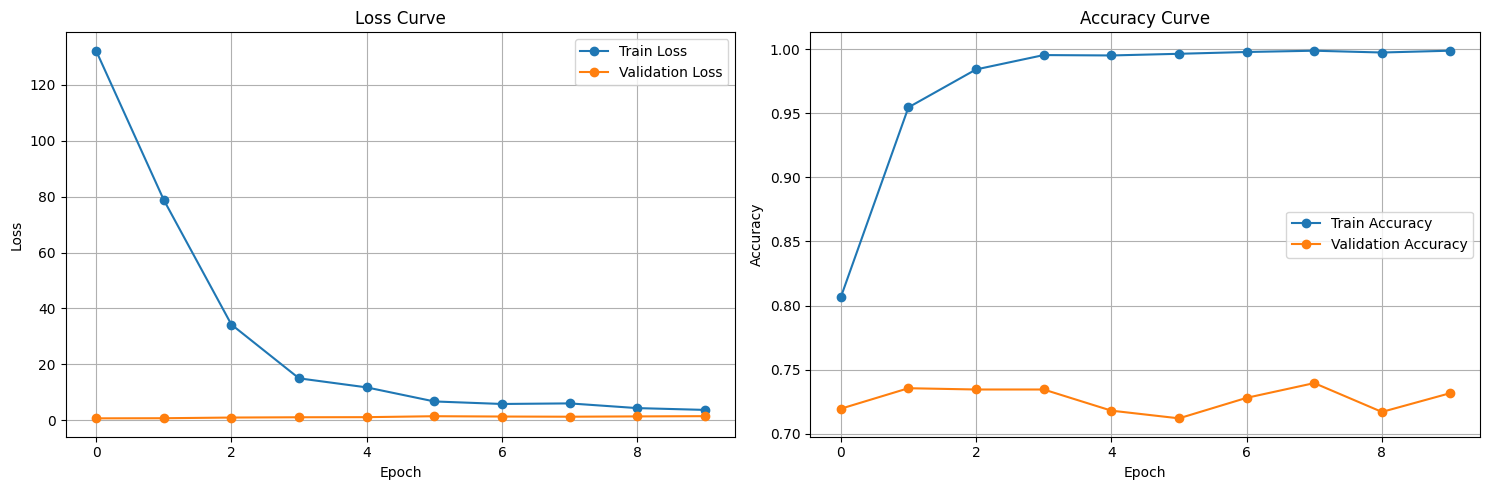

In [36]:
plot_training_curves(train_fine_loss_list, test_fine_loss_list, train_fine_acc_list, test_fine_acc_list)